In [ ]:
#import libraries
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# upload Hitters file
data = files.upload()

Saving Lab2_Hitters.csv to Lab2_Hitters.csv


In [ ]:
# create dataFrame
df = pd.read_csv('Lab2_Hitters.csv')
# print first 5 rows
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
# drop NULL values
df.dropna(inplace=True)
# print first 5 rows
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
# identify X and y values
X, y = df.drop(columns=['Salary', 'Unnamed: 0']), df['Salary']
# print first 5 rows
print(X.head(), y.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors NewLeague  
1   414     375      N        W      632       43      10         N  
2   266     263      A        W      880       82      14         A  
3   838     354      N        E      200       11       3         N  
4    46      33      N        E      805       40       4         N  
5   336     194      A        W      282      421      25         A   1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64


In [ ]:
# colums letters to numbers
X = pd.get_dummies(X, columns=['League', 'Division', 'NewLeague'], dtype='float', drop_first=True)
# print first 5 rows
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1.0,1.0,1.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0.0,1.0,0.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1.0,0.0,1.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1.0,0.0,1.0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0.0,1.0,0.0


In [ ]:
# scale the X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Leaky ReLu**

In [ ]:
# Leaky ReLu
def leaky_relu(x, alpha = 0.05):
  return np.maximum(alpha * x, x)

In [ ]:
# Leaky Relu Derivative
def leaky_relu_der(x, alpha=0.05):
    return np.where(x > 0, 1, alpha)

**Leaky ReLU: Pros and Cons**

Pros

*Fixes "Dead" Neurons:* Unlike the standard ReLU, it prevents neurons from "dying" by allowing a tiny bit of information to pass through even when the numbers are negative.

Faster Training: *italicized text*Because it keeps more neurons active, the model often learns much faster during the training phase.

Cons

*Not Great for Complex Tasks:* It can struggle with highly complex classification problems where more sophisticated functions might perform better.

*Inconsistent Results:* The small negative slope is a bit of a guessing game; if you don't pick the right value, it might not actually improve your model's performance at all.

In [ ]:
def batch_gradient_descent(X, y_true, epoch, regular, lamb, learning_rate):

  # X (columns)
  num_of_features = X.shape[1]

  # number of weight
  weight = np.ones(num_of_features)

  # first value of bias
  bias = 0

  # X (rows)
  total_samples = X.shape[0]

  # to store graphical values
  cost_list = []
  epoch_list = []
  weight_list = []

  for i in range(epoch):
    # for neuron output
    z = np.dot(weight, X.T) + bias  # np.dot() for multiply matrices and X.T is transformed T

    # leaky relu using
    y_predicted = leaky_relu(z)

    # gradient for weight and bias
    weight_grad = -(2/total_samples) * (X.T.dot( (y_true - y_predicted) * leaky_relu_der(z) ))
    bias_grad = -(2/total_samples) * np.sum( (y_true - y_predicted) * leaky_relu_der(z) )

    if regular == "l1":
      # L1 = lambda * sign of weights
      weight_grad += lamb * np.sign(weight)
    elif regular == "l2":
       # L2 = lambda * 2 * weights
      weight_grad += 2 * lamb * weight

    # adjust weights
    weight = weight - learning_rate * weight_grad
    bias = bias - learning_rate * bias_grad

    # list of weight
    weight_list.append(weight)

    # MSE
    cost = np.mean(np.square(y_true - y_predicted))

    # regularization to cost
    if regular == 'l1':
      cost += lamb * np.sum(np.abs(weight))
    elif regular == 'l2':
      cost += lamb * np.sum(np.square(weight))

    if i % 10 == 0:
      # add values to cost list
      cost_list.append(cost)
      epoch_list.append(i)

  return weight, bias, cost_list, epoch_list, weight_list

**Choosing a learning rate**

In [ ]:
w1, b1, cost_1, epoch_1, weight_1 = batch_gradient_descent(X_scaled, y, 300, "None", 0, 0.1)  # learning_rate = 0.1
w2, b2, cost_2, epoch_2, weight_2 = batch_gradient_descent(X_scaled, y, 300, "None", 0, 0.01) # learning_rate = 0.01
w3, b3, cost_3, epoch_3, weight_3 = batch_gradient_descent(X_scaled, y, 300, "None", 0, 0.001) # learning_rate = 0.001

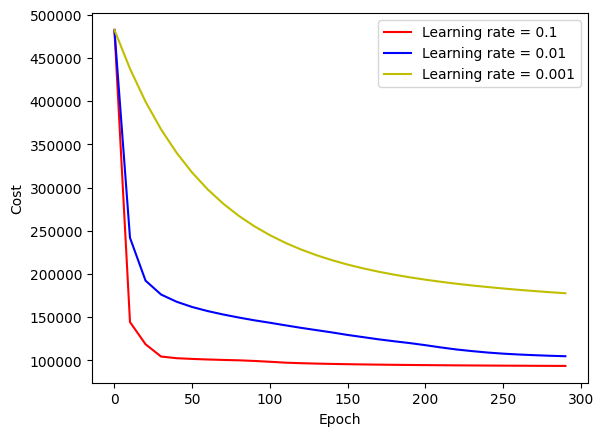

In [ ]:
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_1, cost_1, color='r', label='Learning rate = 0.1')
plt.plot(epoch_2, cost_2, color='b', label='Learning rate = 0.01')
plt.plot(epoch_3, cost_3, color='y', label='Learning rate = 0.001')
plt.legend()
plt.show()

All the learning rates performed well, but ***0.1*** was the most effective, while ***0.001*** was the least. This highlights how critical the right learning rate is for success, so we will use ***0.1*** for our future predictions.

**Cost with L1 (Lasso) and L2**

In [ ]:
weight_l1, bias_l1, cost_l1, epoch_l1, weight_l1 = batch_gradient_descent(X_scaled, y, 500, "l1", 10, 0.1)
weight_l2, bias_l2, cost_l2, epoch_l2, weight_l2 = batch_gradient_descent(X_scaled, y, 500, "l2", 0.01, 0.1)

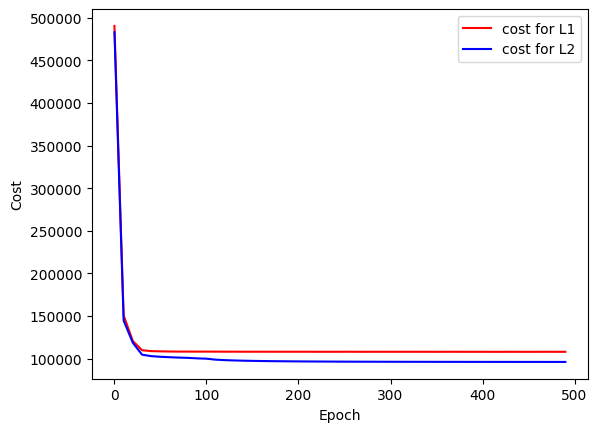

In [ ]:
# graph of cost with L1 and L2
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.plot(epoch_l1, cost_l1, color='r', label='cost for L1')
plt.plot(epoch_l2, cost_l2, color='b', label='cost for L2')
plt.legend()
plt.show()

**Weight list without regularization**

In [ ]:
weight_simple, bias_simple, cost_simple, epoch_simple, weight_simple = batch_gradient_descent(X_scaled, y, 500, "none", 0, 0.1)
# show as DataFrame
df_weight = pd.DataFrame(weight_simple)
# print first 5 rows
df_weight.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,53.775032,56.670986,45.517726,52.789584,58.348814,55.222428,43.420895,59.070921,61.227928,60.568998,62.449616,64.622528,56.249185,34.955303,9.529984,9.740462,-0.703175,-14.809593,2.977830
1,72.921973,80.088848,50.493164,71.817203,71.448070,69.538370,37.940872,56.625764,60.457900,54.669278,60.500925,61.870011,50.278840,47.946011,15.085269,16.040764,0.234930,-26.688470,6.643166
2,81.088245,91.847298,47.133585,79.703159,73.980003,76.431680,34.896520,54.399135,59.481595,48.262269,58.141975,58.923806,45.370992,54.283797,17.739702,19.121188,2.996262,-35.632048,11.765349
3,84.196808,98.063332,41.280352,82.444355,72.477798,80.938930,33.498721,52.971438,59.076952,43.188506,56.425242,57.019643,41.936822,58.174157,18.150116,20.322946,6.767023,-42.310719,17.703543
4,85.208681,101.947531,34.119502,83.017673,68.701966,84.752877,32.525081,51.705620,58.789967,38.642937,54.770554,55.398693,38.814646,61.705316,17.535462,21.657609,11.187714,-47.589574,24.144694


In [ ]:
# the last weights
df_weight.loc[499]

,499
0,-302.712542
1,310.826985
2,11.539431
3,-18.664780
4,-2.635340
5,130.612302
6,-53.633229
7,-148.100542
8,141.257725
9,61.680062


**Weight list with L2 regularization with lambda = 0.01**

In [ ]:
weight_l2, bias_l2, cost_l2, epoch_l2, weight_l2 = batch_gradient_descent(X_scaled, y, 500, "l2", 0.01, 0.1)
# show as DataFrame
df_weight_l2 = pd.DataFrame(weight_l2)
# print first 5 rows
df_weight_l2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,53.773032,56.668986,45.515726,52.787584,58.346814,55.220428,43.418895,59.068921,61.225928,60.566998,62.447616,64.620528,56.247185,34.953303,9.527984,9.738462,-0.705175,-14.811593,2.975830
1,72.813589,79.974640,50.401290,71.710723,71.330774,69.427191,37.853546,56.507581,60.335426,54.548097,60.376047,61.740841,50.166224,47.874872,15.064502,16.019558,0.234484,-26.660826,6.635406
2,80.896234,91.634609,47.014063,79.517780,73.802165,76.254487,34.825915,54.283609,59.355504,48.155150,58.018461,58.796584,45.272816,54.153217,17.685159,19.061344,2.978876,-35.563890,11.731461
3,83.942638,97.767638,41.165093,82.202777,72.268856,80.706826,33.434275,52.854147,58.941850,43.103880,56.301518,56.893556,41.852342,57.995060,18.071309,20.233982,6.723389,-42.194624,17.629864
4,84.907814,101.579713,34.031178,82.736215,68.483338,84.470219,32.458445,51.582396,58.640635,38.584483,54.644516,55.270965,38.743493,61.485039,17.443024,21.546725,11.110839,-47.421007,24.020063


In [ ]:
# the last weights
df_weight_l2.loc[499]

,499
0,-230.178831
1,242.350670
2,2.431650
3,-0.478308
4,4.007084
5,110.492858
6,-55.109686
7,-86.820611
8,125.280127
9,61.321773


**Weight list with L2 regularization with lambda = 10**

In [ ]:
weight_l2, bias_l2, cost_l2, epoch_l2, weight_l2 = batch_gradient_descent(X_scaled, y, 500, "l2", 10, 0.1)
# show as DataFrame
df_weight_l2 = pd.DataFrame(weight_l2)
# print first 5 rows
df_weight_l2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,51.775032,54.670986,43.517726,50.789584,56.348814,53.222428,41.420895,57.070921,59.227928,58.568998,60.449616,62.622528,54.249185,32.955303,7.529984,7.740462,-2.703175,-16.809593,0.977830
1,-32.414069,-30.607284,-37.360370,-31.137436,-41.702316,-37.277065,-44.931191,-57.510283,-57.956937,-62.399359,-60.287121,-63.115773,-57.880058,-19.083125,-3.318982,-3.690548,2.467940,3.633863,1.561439
2,59.075947,58.594735,53.472191,56.341998,64.368225,58.042386,69.165961,83.071275,83.252820,78.784549,84.236309,85.019429,77.908578,30.496073,12.162340,10.705362,-0.712990,-6.865104,-0.302815
3,-44.981243,-39.892070,-55.776332,-42.356719,-59.186017,-52.248470,-93.879138,-107.344276,-105.856362,-106.146970,-108.513009,-110.538529,-105.535751,-18.030572,-5.258469,-2.176288,3.768769,-5.530446,5.152345
4,88.328938,85.074710,87.437095,83.858642,100.550901,88.247154,138.800789,154.642947,152.722753,141.168097,153.880401,153.629968,145.113039,35.427358,14.602198,9.576803,-3.744442,2.129665,-5.055332


In [ ]:
# the last weights
df_weight_l2.loc[499]

,499
0,-1.818537e+110
1,-1.788193e+110
2,-1.978097e+110
3,-1.856747e+110
4,-2.240504e+110
5,-1.990182e+110
6,-2.702523e+110
7,-3.194169e+110
8,-3.204484e+110
9,-3.188322e+110


**Weight list with L1 regularization with lambda = 10**

In [ ]:
weight_l1, bias_l1, cost_l1, epoch_l1, weight_l1 = batch_gradient_descent(X_scaled, y, 500, "l1", 10, 0.1)
# show as DataFrame
df_weight_l1 = pd.DataFrame(weight_l1)
# print first 5 rows
df_weight_l1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,52.775032,55.670986,44.517726,51.789584,57.348814,54.222428,42.420895,58.070921,60.227928,59.568998,61.449616,63.622528,55.249185,33.955303,8.529984,8.740462,-1.703175,-15.809593,1.977830
1,71.118255,78.301047,48.953514,70.099754,69.877227,67.852602,36.975774,55.911906,59.711170,53.599633,59.752144,61.006864,49.432800,46.191280,13.002018,13.891431,0.037454,-26.968011,4.473669
2,79.139838,89.962478,45.560495,77.926908,72.428035,74.646345,33.504350,53.515541,58.591048,47.095301,57.286634,57.961421,44.312217,52.239153,14.908971,16.230517,1.724676,-34.915844,8.557957
3,82.256688,96.167564,39.446339,80.572251,70.952996,79.011297,31.662987,51.971763,58.095735,41.874561,55.490741,55.985820,40.678264,55.835310,14.957563,17.048543,4.776109,-40.828489,13.810677
4,82.886791,99.779686,32.030082,80.754553,67.171455,82.512757,30.783364,50.866247,57.998163,37.358424,54.013648,54.512411,37.775352,58.844243,13.818614,17.699358,8.366761,-45.685396,19.456669


In [ ]:
# the last weights
df_weight_l1.loc[499]

,499
0,-55.003131
1,156.678254
2,-0.267535
3,1.051080
4,-0.135500
5,78.239753
6,0.115991
7,-0.693284
8,40.448983
9,17.815470


**Weight list with L1 regularization with lambda = 0.01**

In [ ]:
weight_l1, bias_l1, cost_l1, epoch_l1, weight_l1 = batch_gradient_descent(X_scaled, y, 500, "l1", 0.01, 0.1)
# show as DataFrame
df_weight_l1 = pd.DataFrame(weight_l1)
# print first 5 rows
df_weight_l1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,53.774032,56.669986,45.516726,52.788584,58.347814,55.221428,43.419895,59.069921,61.226928,60.567998,62.448616,64.621528,56.248185,34.954303,9.528984,9.739462,-0.704175,-14.810593,2.976830
1,72.920554,80.087413,50.491743,71.815750,71.446769,69.537001,37.939628,56.624741,60.456889,54.668254,60.499934,61.869046,50.277779,47.944395,15.083413,16.038899,0.235002,-26.688460,6.641262
2,81.086667,91.845690,47.131909,79.701503,73.978640,76.430102,34.894966,54.398080,59.480572,48.261225,58.140999,58.922874,45.369848,54.281742,17.737204,19.118665,2.995355,-35.631173,11.762509
3,84.195131,98.061606,41.278395,82.442514,72.476397,80.937162,33.496833,52.970355,59.075922,43.187405,56.424276,57.018730,41.935579,58.171767,18.147139,20.319921,6.765329,-42.309081,17.699954
4,85.206907,101.945698,34.117242,83.015634,68.700530,84.750918,32.522890,51.704540,58.788961,38.641779,54.769622,55.397819,38.813343,61.702654,17.532104,21.654171,11.185375,-47.587264,24.140494


In [ ]:
# the last weights

df_weight_l1.loc[499]

,499
0,-302.565384
1,310.639019
2,11.457239
3,-18.562105
4,-2.547031
5,130.537123
6,-53.628280
7,-147.765209
8,141.058316
9,61.668520


***Conclusion***

**In this lab, we used Leaky ReLU and L1/L2 regularization to build an accurate salary prediction model without overfitting. Because our activation function resulted in a lower cost, the model's overall accuracy is significantly improved.**